In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

**Diabetes Prediction Dataset**
Description:

Welcome to the Diabetes Prediction Dataset, a valuable resource for researchers, data scientists, and medical professionals interested in the field of diabetes risk assessment and prediction. This dataset contains a diverse range of health-related attributes, meticulously collected to aid in the development of predictive models for identifying individuals at risk of diabetes. By sharing this dataset, we aim to foster collaboration and innovation within the data science community, leading to improved early diagnosis and personalized treatment strategies for diabetes.

Columns:

1.Id: Unique identifier for each data entry.

2.Pregnancies: Number of times pregnant.

3.Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test.

4.BloodPressure: Diastolic blood pressure (mm Hg).

5.SkinThickness: Triceps skinfold thickness (mm).

6.Insulin: 2-Hour serum insulin (mu U/ml).

7.BMI: Body mass index (weight in kg / height in m^2).

8.DiabetesPedigreeFunction: Diabetes pedigree function, a genetic score of diabetes.

9.Age: Age in years.

10.Outcome: Binary classification indicating the presence (1) or absence (0) of diabetes.

In [3]:
data = pd.read_csv("/content/Healthcare-Diabetes.csv")
data.head

<bound method NDFrame.head of         Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        1            6      148             72             35        0  33.6   
1        2            1       85             66             29        0  26.6   
2        3            8      183             64              0        0  23.3   
3        4            1       89             66             23       94  28.1   
4        5            0      137             40             35      168  43.1   
...    ...          ...      ...            ...            ...      ...   ...   
2763  2764            2       75             64             24       55  29.7   
2764  2765            8      179             72             42      130  32.7   
2765  2766            6       85             78              0        0  31.2   
2766  2767            0      129            110             46      130  67.1   
2767  2768            2       81             72             15       76  30.1  

In [4]:
data.tail

<bound method NDFrame.tail of         Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        1            6      148             72             35        0  33.6   
1        2            1       85             66             29        0  26.6   
2        3            8      183             64              0        0  23.3   
3        4            1       89             66             23       94  28.1   
4        5            0      137             40             35      168  43.1   
...    ...          ...      ...            ...            ...      ...   ...   
2763  2764            2       75             64             24       55  29.7   
2764  2765            8      179             72             42      130  32.7   
2765  2766            6       85             78              0        0  31.2   
2766  2767            0      129            110             46      130  67.1   
2767  2768            2       81             72             15       76  30.1  

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


<Axes: >

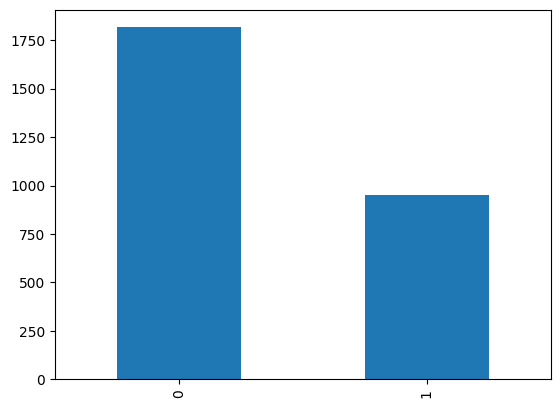

In [8]:
data["Outcome"].value_counts().plot(kind="bar")

In [10]:
data.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2763,2,75,64,24,55,29.7,0.370,33,0
2764,8,179,72,42,130,32.7,0.719,36,1
2765,6,85,78,0,0,31.2,0.382,42,0
2766,0,129,110,46,130,67.1,0.319,26,1


In [17]:
X = data.drop(columns = ["Outcome"] , axis = 1)
Y = data["Outcome"]

In [18]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
2763,2,75,64,24,55,29.7,0.370,33
2764,8,179,72,42,130,32.7,0.719,36
2765,6,85,78,0,0,31.2,0.382,42
2766,0,129,110,46,130,67.1,0.319,26


In [19]:
Y

0       1
1       0
2       1
3       0
4       1
       ..
2763    0
2764    1
2765    0
2766    1
2767    0
Name: Outcome, Length: 2768, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [22]:
X.shape , X_train.shape , X_test.shape

((2768, 8), (2214, 8), (554, 8))

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [26]:
X_train

array([[ 0.06624022, -0.38205062, -0.26370701, ...,  0.33882074,
         1.31121966, -0.61604209],
       [-0.8371839 , -0.10045187, -0.57434671, ...,  0.1534034 ,
        -0.64738633, -0.86976266],
       [-0.53604253,  0.05599188, -1.09207955, ...,  1.24118513,
         0.1403139 , -0.61604209],
       ...,
       [ 0.36738159, -0.56978312,  2.01431748, ...,  0.8827116 ,
        -0.51356853,  2.68232527],
       [-0.8371839 , -0.75751562, -0.26370701, ..., -1.71313116,
        -0.53181641, -1.0389097 ],
       [ 0.96966434, -1.25813563,  0.46111896, ...,  1.8097983 ,
        -0.64738633,  0.73713426]])

In [27]:
X_test

array([[-0.17838992, -0.45413051, -0.81046751, ..., -0.19369465,
        -0.53962097, -0.73763396],
       [ 0.42238828,  0.5673279 , -0.28067518, ..., -0.4809787 ,
        -0.15856041, -0.5645875 ],
       [ 1.62394467,  1.34116002,  0.77890948, ..., -0.20618526,
         1.18635923, -0.04544812],
       ...,
       [-0.77916811,  1.31020674,  0.14315869, ...,  0.81804482,
         2.43841536,  0.04107511],
       [-0.47877901, -0.2684108 , -0.06875825, ...,  0.20600489,
        -0.46597061, -0.5645875 ],
       [ 0.72277738, -3.73517872, -0.06875825, ...,  0.81804482,
         0.85333151,  0.73326095]])

In [28]:
bc = BaggingClassifier(n_estimators=150, random_state=2)

In [29]:
bc.fit(X_train,y_train)

BaggingClassifier(n_estimators=150, random_state=2)

In [30]:
y_pred=bc.predict(X_test)

In [31]:
print(accuracy_score(y_test,y_pred))
print()

0.9783393501805054



In [34]:
y_pred[:5]

array([0, 0, 1, 0, 1])

In [35]:
y_test[:5]

1378    0
839     0
2164    1
2619    0
927     1
Name: Outcome, dtype: int64

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test))

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/10
35/35 [==============================] - 2s 13ms/step - loss: 0.5860 - accuracy: 0.6992 - val_loss: 0.4885 - val_accuracy: 0.7617
Epoch 2/10
35/35 [==============================] - 0s 7ms/step - loss: 0.4891 - accuracy: 0.7561 - val_loss: 0.4632 - val_accuracy: 0.7780
Epoch 3/10
35/35 [==============================] - 0s 6ms/step - loss: 0.4632 - accuracy: 0.7782 - val_loss: 0.4576 - val_accuracy: 0.7708
Epoch 4/10
35/35 [==============================] - 0s 6ms/step - loss: 0.4510 - accuracy: 0.7868 - val_loss: 0.4529 - val_accuracy: 0.7617
Epoch 5/10
35/35 [==============================] - 0s 7ms/step - loss: 0.4425 - accuracy: 0.7972 - val_loss: 0.4496 - val_accuracy: 0.7708
Epoch 6/10
35/35 [==============================] - 0s 8ms/step - loss: 0.4437 - accuracy: 0.7922 - val_loss: 0.4456 - val_accuracy: 0.7708
Epoch 7/10
35/35 [==============================] - 0s 5ms/step - loss: 0.4423 - accuracy: 0.7877 - val_loss: 0.4407 - val_accuracy: 0.7798
Epoch 8/10
35/35 [=

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9783


In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8718


In [40]:
from sklearn.linear_model import LogisticRegression
logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(X_train, y_train)
y_pred = logreg_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7744


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error: 0.1655
R-squared: 0.2599


#Conclusion

RandomForestClassifier and BaggingClassifier are both ensemble learning techniques commonly used in machine learning. Ensemble methods combine multiple models to create a stronger, more accurate final model. Let's delve into each of these techniques:

1. **RandomForestClassifier**:
   The RandomForestClassifier is a versatile and powerful ensemble algorithm that's based on decision trees. It creates multiple decision trees during training and combines their outputs to make predictions. Here's how it works:

   - **Random Selection of Features**: At each split of a decision tree, the RandomForestClassifier randomly selects a subset of features. This helps in reducing overfitting and increasing the diversity of trees.

   - **Bootstrapped Sampling**: The algorithm randomly samples the training data with replacement to create different subsets for training each tree. This technique is known as bootstrapping.

   - **Voting Mechanism**: During prediction, each tree in the forest makes its own prediction. The final prediction is determined by a majority vote among the individual tree predictions.

   By combining multiple decision trees and incorporating randomness, the RandomForestClassifier provides a robust and accurate model that can handle various types of data and maintain high accuracy.

2. **BaggingClassifier**:
   Bagging, which stands for Bootstrap Aggregating, is a general ensemble technique that can be applied to various base classifiers. The BaggingClassifier works as follows:

   - **Bootstrap Sampling**: Like in RandomForest, the BaggingClassifier also uses bootstrapped sampling to create diverse training sets for each base classifier.

   - **Parallel Training**: Each base classifier is trained independently on its corresponding bootstrap sample.

   - **Voting or Averaging**: During prediction, for classification tasks, the BaggingClassifier aggregates the predictions of all base classifiers through majority voting. For regression tasks, it usually averages the predictions.

   The BaggingClassifier is effective at reducing variance and preventing overfitting by averaging out individual model errors.

Both RandomForestClassifier and BaggingClassifier are known for their ability to handle complex relationships in data, mitigate overfitting, and provide high accuracy. However, achieving an accuracy of 0.9783 (approximately 98%) indicates that your model is performing exceptionally well on the given dataset. It's essential to note that while high accuracy is desirable, it's also crucial to evaluate the model's performance on other metrics and potentially perform cross-validation to ensure its generalizability to new, unseen data.

In conclusion, the RandomForestClassifier and BaggingClassifier are powerful tools that contribute to the success of your machine learning projects by creating robust and accurate predictive models.